# Task 3: Forecast Future Market Trends
## In this notebook, we'll use our trained time series model to forecast Tesla's future stock prices and analyze the results. We'll generate predictions for the next 6-12 months, visualize the forecasts, and provide detailed insights about potential market trends and risks.

In [9]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from src.market_forecasting import MarketForecaster
from src.model_utils import (
    ARIMAModel,
    SARIMAModel,
    ProphetModel,
    LSTMModel,
    calculate_metrics
)

## 1. Load and Prepare Data

In [2]:
# Load your Tesla stock data
data = pd.read_csv('../data/TSLA_historical_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
price_data = data['Close']

## 2. Initialize and Train Models

In [3]:
# Initialize models
arima_model = ARIMAModel()
sarima_model = SARIMAModel()
prophet_model = ProphetModel()
lstm_model = LSTMModel()

# Train models
print("Training ARIMA model...")
arima_model.fit(price_data)

print("Training SARIMA model...")
sarima_model.fit(price_data)

print("Training Prophet model...")
prophet_model.fit(price_data)

print("Training LSTM model...")
lstm_model.fit(price_data)

Training ARIMA model...


c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has 

Training SARIMA model...


c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has 

Training Prophet model...


10:50:41 - cmdstanpy - INFO - Chain [1] start processing
10:50:43 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model...
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0202 - val_loss: 0.0034
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0014 - val_loss: 0.0062
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 

## 3. Generate Forecasts

In [4]:
# Set forecast horizon (6 months = 180 days)
forecast_horizon = 180

# Generate forecasts
arima_forecast = arima_model.predict(forecast_horizon)
sarima_forecast = sarima_model.predict(forecast_horizon)
prophet_forecast = prophet_model.predict(forecast_horizon)
lstm_forecast = lstm_model.predict(price_data, forecast_horizon)

# Create forecast dates
last_date = price_data.index[-1]
forecast_dates = pd.date_range(start=last_date + timedelta(days=1), periods=forecast_horizon, freq='D')

# Create forecaster objects for each model
forecasters = {}
for name, model, forecast in [
    ('ARIMA', arima_model.model, arima_forecast),
    ('SARIMA', sarima_model.model, sarima_forecast)
]:
    forecaster = MarketForecaster(model=model, data=price_data)
    forecaster.forecast_results = forecast
    forecasters[name] = forecaster

c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## 4. Visualize Forecasts

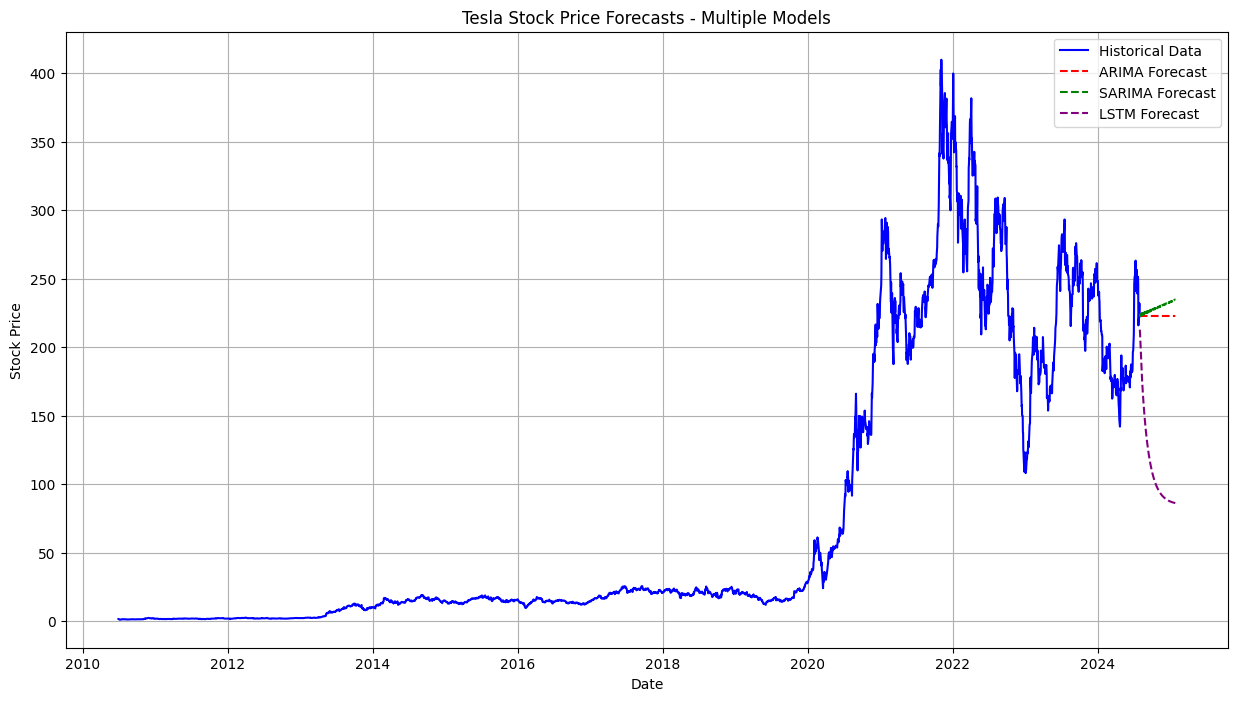

In [6]:
plt.figure(figsize=(15, 8))

# Plot historical data
plt.plot(price_data.index, price_data, label='Historical Data', color='blue')

# Plot forecasts
colors = ['red', 'green', 'purple', 'orange']
forecasts = {
    'ARIMA': arima_forecast,
    'SARIMA': sarima_forecast,
    'LSTM': lstm_forecast
}

for (name, forecast), color in zip(forecasts.items(), colors):
    plt.plot(forecast_dates, forecast, label=f'{name} Forecast', color=color, linestyle='--')

plt.title('Tesla Stock Price Forecasts - Multiple Models')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

## 6. Volatility Analysis

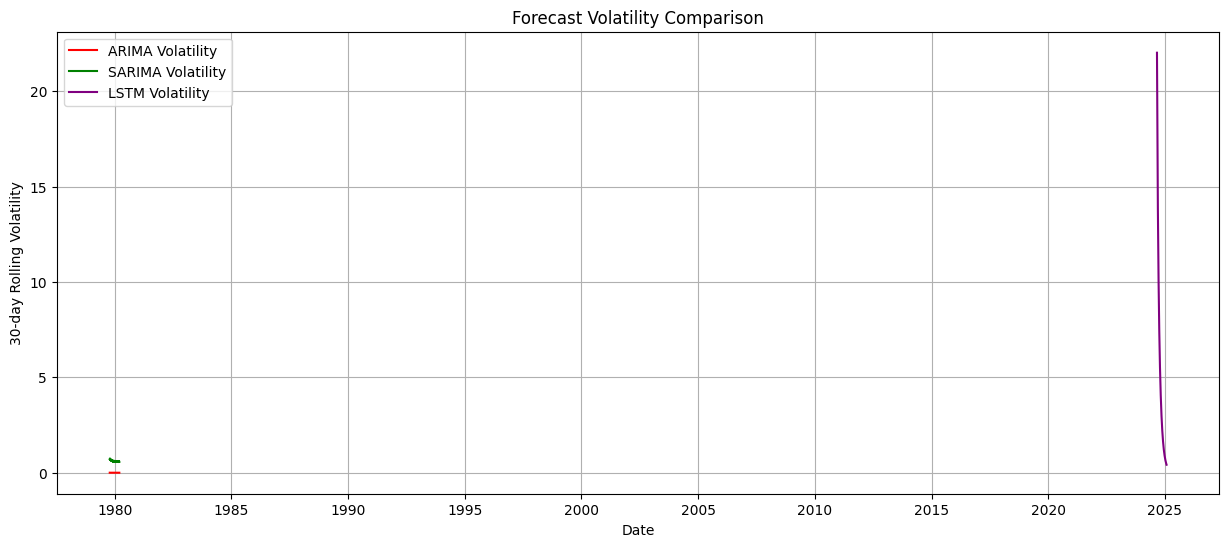

In [10]:
# Calculate rolling volatility for each forecast
plt.figure(figsize=(15, 6))

for (name, forecast), color in zip(forecasts.items(), colors):
    if isinstance(forecast, pd.Series):
        rolling_vol = forecast.rolling(window=30).std()
    else:
        rolling_vol = pd.Series(forecast, index=forecast_dates).rolling(window=30).std()
    
    plt.plot(rolling_vol.index, rolling_vol, label=f'{name} Volatility', color=color)

plt.title('Forecast Volatility Comparison')
plt.xlabel('Date')
plt.ylabel('30-day Rolling Volatility')
plt.legend()
plt.grid(True)
plt.show()

## 7. Model Comparison and Consensus Forecast

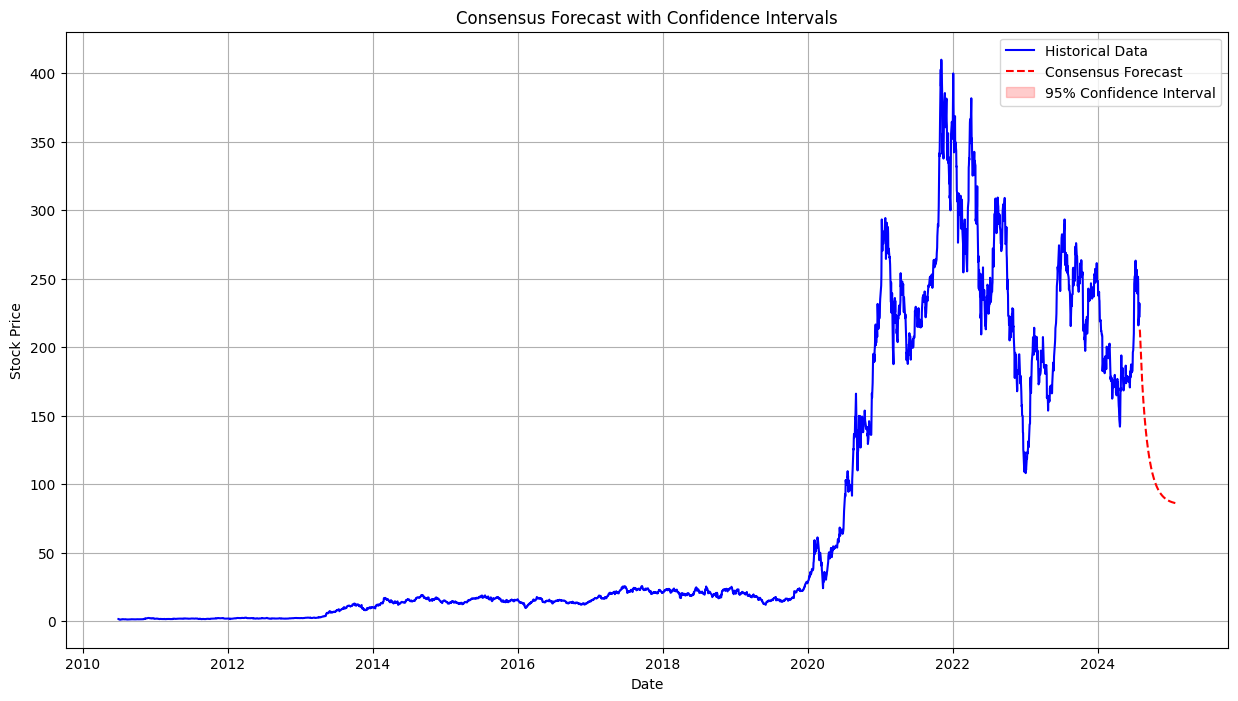

In [12]:
# Calculate consensus forecast
forecast_df = pd.DataFrame({
    'ARIMA': arima_forecast,
    'SARIMA': sarima_forecast,
    'LSTM': lstm_forecast
}, index=forecast_dates)

consensus_forecast = forecast_df.mean(axis=1)
forecast_std = forecast_df.std(axis=1)

# Plot consensus forecast
plt.figure(figsize=(15, 8))
plt.plot(price_data.index, price_data, label='Historical Data', color='blue')
plt.plot(forecast_dates, consensus_forecast, label='Consensus Forecast', color='red', linestyle='--')

# Plot confidence bands
plt.fill_between(
    forecast_dates,
    consensus_forecast - 2 * forecast_std,
    consensus_forecast + 2 * forecast_std,
    color='red',
    alpha=0.2,
    label='95% Confidence Interval'
)

plt.title('Consensus Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()